In [1]:
"""
Name: con_Infection_Rate.ipynb
Authors: Stephan Meighen-Berger
Example of how to calculate infection rates using contagion
"""

'\nName: con_Infection_Rate.ipynb\nAuthors: Stephan Meighen-Berger\nExample of how to calculate infection rates using contagion\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
from tqdm import tqdm

In [3]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
# Adding path to module
sys.path.append("../core/")

In [5]:
# Module imports
from contagion import CONTAGION
from con_config import config

In [6]:
# Creating a fourth_day object
contagion = CONTAGION()

In [7]:
# Launching solver
seconds = 1000
pop = 200
infected=2

In [8]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.5

In [9]:
# Storing the solutions
res_store = []
mean_vel = [1., 1.5, 2.]
for i in range(3):
    res_store.append(contagion.solve(pop, mean_vel[i], 2., seconds=seconds, vel_var=1., dist_var=1., infected=infected))

../core\con_mc_sim.py:284: RuntimeWarning: invalid value encountered in double_scalars
  (np.linalg.norm(new_vec) * np.linalg.norm(current_vec))


In [10]:
# Binning function
def binning(array, s_bin=10):
    return np.array([
        np.sum(array[i*s_bin:(i+1)*s_bin])
        for i in range(int(len(array)/s_bin))
    ])

In [11]:
# Binning
bin_size = 10
res_binned = np.array([
    binning(np.sum(res_store[i], axis=1), s_bin=bin_size)
    for i in range(len(res_store))
])

In [12]:
# Smoothing the results
res_smoothed = np.array([
    savgol_filter(res_binned[i], 31, 3)
    for i in range(len(res_binned))
])

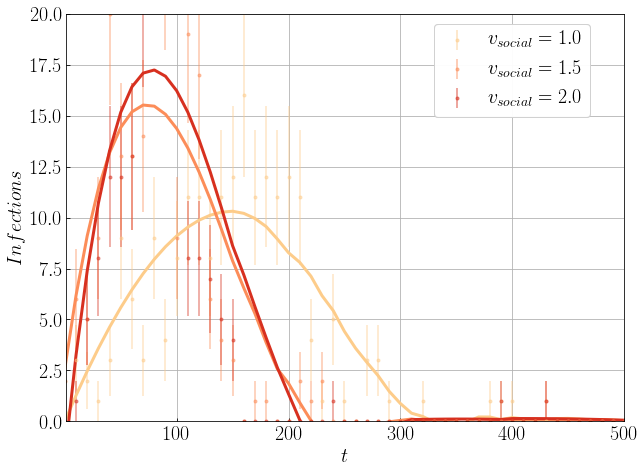

In [13]:
# Infections per time step
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
for i, _ in enumerate(mean_vel):
    ax.errorbar(
        contagion.t[::bin_size], 
        res_binned[i],
        yerr=np.sqrt(res_binned[i]),
        fmt='o',
        markersize=lw, color=colors[i],
        alpha=0.5,
        label=r'$v_{social} = %.1f$' %mean_vel[i]
    )
    ax.plot(
        contagion.t[::bin_size], 
        res_smoothed[i], 
        lw=lw, color=colors[i],
    )
ax.set_xlim(1e0, 500)
ax.set_ylim(0., 20)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r'$t$', fontsize=fontsize)
ax.set_ylabel(r'$Infections$', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
plt.grid(True)
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.8, +1.),
                 ncol=1, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=True)
ax.add_artist(lgd1)
plt.show()

In [14]:
# figure.savefig("C:\\Users\\steph\\OneDrive\\University TUM\\PhD\\Plots\\Biolumi\\MC_Social_Rate_pop_6000_infected_5.png",
#                bbox_inches='tight')

In [15]:
# Animation to show the spread.
"""
# Animation stack
# This requires "save population" in config to be set to true
fontsize = 15.
import matplotlib.colors as colors
# The frames are created in a loop
cmap = plt.cm.viridis
norm = colors.Normalize(vmin=0., vmax=1.)
for i, _ in tqdm(enumerate(fd.t)):
    figure = plt.figure(figsize=(std_size, std_size * 6. / 8.))
    ax = figure.add_subplot(111)
    ax.scatter(fd.mc_run.distribution[i][:,0], fd.mc_run.distribution[i][:,1],
               color=cmap(norm(fd.mc_run.distribution[i][:,-1])),
               s=50.
               )
    ax.title=ax.set_title('Population t = %.f' %fd.t[i], fontsize=fontsize)
    ax.set_xlim(-fd.world.bounding_box/2, fd.world.bounding_box/2)
    ax.set_ylim(-fd.world.bounding_box/2, fd.world.bounding_box/2)
    ax.set_xlabel(r'$X$', fontsize=fontsize)
    ax.set_ylabel(r'$Y$', fontsize=fontsize)
    ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
    ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
    figure.savefig('C:\\Users\\steph\\OneDrive\\University TUM\\PhD\\Plots\\Biolumi\\Frames\\frame_%d.png' %i)
    plt.close(figure)
import imageio
images = []
filenames = np.array([
    'C:\\Users\\steph\\OneDrive\\University TUM\\PhD\\Plots\\Biolumi\\Frames\\frame_%d.png' %i
    for i in range(len(fd.t))
])
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('C:\\Users\\steph\\OneDrive\\University TUM\\PhD\\Plots\\Biolumi\\Social_Distancing.gif',
                images, duration=0.1)
"""

'\n# Animation stack\n# This requires "save population" in config to be set to true\nfontsize = 15.\nimport matplotlib.colors as colors\n# The frames are created in a loop\ncmap = plt.cm.viridis\nnorm = colors.Normalize(vmin=0., vmax=1.)\nfor i, _ in tqdm(enumerate(fd.t)):\n    figure = plt.figure(figsize=(std_size, std_size * 6. / 8.))\n    ax = figure.add_subplot(111)\n    ax.scatter(fd.mc_run.distribution[i][:,0], fd.mc_run.distribution[i][:,1],\n               color=cmap(norm(fd.mc_run.distribution[i][:,-1])),\n               s=50.\n               )\n    ax.title=ax.set_title(\'Population t = %.f\' %fd.t[i], fontsize=fontsize)\n    ax.set_xlim(-fd.world.bounding_box/2, fd.world.bounding_box/2)\n    ax.set_ylim(-fd.world.bounding_box/2, fd.world.bounding_box/2)\n    ax.set_xlabel(r\'$X$\', fontsize=fontsize)\n    ax.set_ylabel(r\'$Y$\', fontsize=fontsize)\n    ax.tick_params(axis = \'both\', which = \'major\', labelsize=fontsize)\n    ax.tick_params(axis = \'both\', which = \'minor\